In [57]:
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging

In [60]:
def nx_to_igraph(nx_g) -> ig.Graph:
    """
    Convert networkx graph to an equivalent igraph Graph
    attributes are stored as vertex sequences
    """
    nx_g = nx.convert_node_labels_to_integers(nx_g, label_attribute='old_label')
    old_label = nx.get_node_attributes(nx_g, 'old_label')

    weights = nx.get_edge_attributes(nx_g, name='wt')  # WEIGHTS are stored in WT
    if len(weights) == 0:
        is_weighted = False
        edge_list = list(nx_g.edges())
    else:
        is_weighted = True
        edge_list = [(u, v, w) for (u, v), w in weights.items()]

    is_directed = nx_g.is_directed()
    ig_g = ig.Graph.TupleList(edges=edge_list, directed=is_directed,
                              weights=is_weighted)

#     logging.error(f'iGraph: n={ig_g.vcount()}\tm={ig_g.ecount()}\tweighted={is_weighted}\tdirected={is_directed}')

    for v in ig_g.vs:
        v['name'] = str(old_label[v.index])  # store the original labels in the name attribute
        v['label'] = str(v['name'])

    return ig_g

In [64]:
chains, cliques, cycles, wss, bas = [], [], [], [], []
for n in range(10, 501, 10):
    chains.append(nx.path_graph(n))
    cliques.append(nx.complete_graph(n))
    wss.append(nx.connected_watts_strogatz_graph(n, 3, 0.4))
    bas.append(nx.barabasi_albert_graph(n, 3, 3))
    cycles.append(nx.cycle_graph(n))

In [65]:
def make_rows(graphs, kind):
    rows = []
    for g in graphs:
        ig_g = nx_to_igraph(g)
        row = {'kind': kind, 'n': g.order(), 'm': g.size(),
               'CC': ig_g.transitivity_avglocal_undirected(mode='zero'), 
               'APL': ig_g.average_path_length()}
        rows.append(row)
    return pd.DataFrame(rows)

In [66]:
dfs = []
kinds = ['chain', 'clique', 'cycle', 'WS', 'BA']
for kind, graphs in zip(kinds, (chains, cliques, cycles, wss, bas)):
    df = make_rows(kind=kind, graphs=graphs)
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)

In [67]:
df.kind.unique()

array(['chain', 'clique', 'cycle', 'WS', 'BA'], dtype=object)

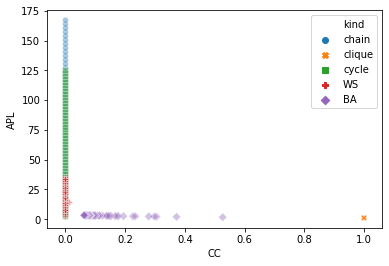

In [74]:
ax = plt.gca()
# ax.set_xscale('log')
sns.scatterplot(x='CC', y='APL', data=df, style='kind', hue='kind', alpha=0.4);

In [42]:
ig_g = ig.Graph.Famous('Zachary')

In [52]:
g = nx.karate_club_graph()
nx.average_clustering(g)

0.5706384782076823

In [53]:
ig_g.transitivity_undirected(mode='zero')

0.2556818181818182

0.5706384782076824

In [48]:
ig_g.average_path_length()

2.408199643493761